## Dust Concentration in Miocene Simulations --- Composite Aerosols patterns
#### 1. Detemining Dust indices
#### 2. Defining High/Low Dust months
#### 3. Examining Composite Aerosols (Black Carbon & Sulfates) Patterns based on the definition
====================================================================================================================

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def label_latlon(ax,lons,lats):
    """ Add tick labels """
    # Define the xticks for longtitude
    ax.set_xticks(lons,crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Define ytick for latitude
    ax.set_yticks(lats,crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    return

In [2]:
# --- read data --- 

path = '/scratch/pchen25/clim680_dataset/MidMiocene/'
file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_burdendust_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_burdendust_100_300.nc'

ds_Pi = xr.open_mfdataset(path+file_Pi)
ds_Mio = xr.open_mfdataset(path+file_Mio)

ds_Pi

<xarray.Dataset>
Dimensions:     (time: 1200, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time        (time) object 1900-02-01 00:00:00 ... 2000-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    BURDENDUST  (time, lat, lon) float32 dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    time_bnds   (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon
    title:            UNSET
    logname:          pacosta
    host:             r8i0n31
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon/run/B.MMI...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Sun Nov 12 20:18:00 2023: ncrcat ./B.MMIOx2_C5_280_WISO...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [3]:
# input LANDFRAC --- for mapping the lands

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

var = 'LANDFRAC'
mask = ds[var][0,:,:]
data = ds['TS']

data, lons = add_cyclic_point(data, coord=ds['lon'])
mask, mask_lons = add_cyclic_point(mask, coord=ds['lon'])

===========================================================================
### Read variable: BURDENDUST
* long_name: Dust aerosol burden --- total concentration of dust per meter square over a grid
* unit: ($kg/m^2$)

In [4]:
# --- (var.): dust ---

var = 'BURDENDUST'
dust_Pi = ds_Pi[var]
dust_Mio = ds_Mio[var][1200:2400,:,:]

lon = ds_Pi['lon']
lat = ds_Pi['lat']

In [5]:
# --- Anomaly ---
dust_Pi_gb = dust_Pi.groupby('time.month')
dust_Mio_gb = dust_Mio.groupby('time.month')
dust_Pi_anom = dust_Pi_gb - dust_Pi_gb.mean(dim='time')
dust_Mio_anom = dust_Mio_gb - dust_Mio_gb.mean(dim='time')

BurdenDust_Pi_mean = dust_Pi.mean(dim=('time'))
BurdenDust_Mio_mean = dust_Mio.mean(dim=('time'))
BurdenDust_Diff_mean = BurdenDust_Mio_mean - BurdenDust_Pi_mean

BurdenDust_Pi_mean_new, lons = add_cyclic_point(BurdenDust_Pi_mean, coord=ds['lon'])
BurdenDust_Mio_mean_new, lons = add_cyclic_point(BurdenDust_Mio_mean, coord=ds['lon'])
BurdenDust_Diff_mean_new, lons = add_cyclic_point(BurdenDust_Diff_mean, coord=ds['lon'])

BurdenDust_2D = [BurdenDust_Mio_mean_new, BurdenDust_Pi_mean_new, BurdenDust_Diff_mean_new]

/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]
/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


Text(0.315, 0.49, 'index 3')

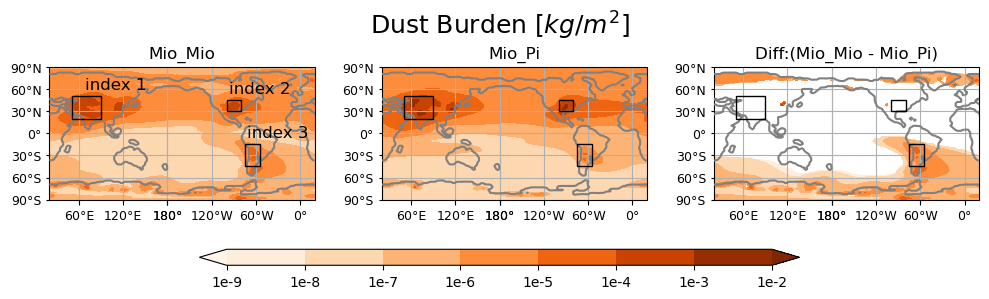

In [6]:
# --- Plotting Dust Burden in [Mio_Mio, Mio_Pi, Diff:(Mio_Mio - Mio_Pi)] ---

data_title = 'Dust Burden [$kg/m^2$]'
plot_name = 'plot_dust_burden_pattern'
levels = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2] # manually set the levels we want to see here
levels_ticks = ['1e-9','1e-8','1e-7','1e-6','1e-5','1e-4','1e-3','1e-2']

dust_species = ['Mio_Mio','Mio_Pi','Diff:(Mio_Mio - Mio_Pi)']
    
# Define the figure and each axis
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(12,8))
    
# Set Width / Height padding between subplots, expressed as a fraction of the subplot width
fig.subplots_adjust(wspace=0.25, hspace=0.05) 
    
# axs is a 2 dimensional array of `GeoAxes` --> flatten it into a 1-D array
axs=axs.flatten()

# Loop and plot
for i,m in enumerate(dust_species):
        
    # Contour plot
    cs=axs[i].contourf(lons, ds_Pi['lat'], BurdenDust_2D[i],
                       levels = levels,
                       locator=ticker.LogLocator(),
                       transform = ccrs.PlateCarree(),
                       #cmap=cmap,extend='max')
                       cmap='Oranges',extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()  
    axs[i].xaxis.set_major_formatter(lon_formatter)  # set the format of xticks_label
    axs[i].tick_params(axis='y', size=2)             # set xtick parameters
    for xlabel in axs[i].get_xticklabels():          # set xticks_label
        xlabel.set_fontsize(9)        

    # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)  # set the format of yticks_label
    axs[i].tick_params(axis='y', size=2)             # set ytick parameters
    for ylabel in axs[i].get_yticklabels():          # set yticks_label
        ylabel.set_fontsize(9)        
    
    # Title each subplot with the name of the month
    axs[i].set_title(dust_species[i])
        
    # Add gridlines
    axs[i].gridlines(zorder=2)
        
    cs_mask = axs[i].contour(lons,ds_Pi['lat'],mask,[0.1,1],
                             transform = ccrs.PlateCarree(),
                             #colors='grey',alpha=1.0, zorder=3)
                             linestyles='solid', colors='grey', zorder=3)
    
    # Add patches
    # ( (x,y)[center: (200,0)], width, height, ...)
    rect1 = patches.Rectangle((-150, 20), 40, 30, lw = 1, edgecolor = 'k', facecolor = 'none', zorder=4)  # (50~90E; 20~50N)
    rect2 = patches.Rectangle((60, 30), 20, 15, lw = 1, edgecolor = 'k', facecolor = 'none', zorder=4)  # (100~80W; 30~45N)
    rect3 = patches.Rectangle((85, -45), 20, 30, lw = 1, edgecolor = 'k', facecolor = 'none', zorder=4)  # (75~55W; 15~45S)
    axs[i].add_patch(rect1)
    axs[i].add_patch(rect2)
    axs[i].add_patch(rect3)
    
        
# Add colorbar
cax  = fig.add_axes([0.25, 0.33, 0.5, 0.02])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal',
                    format=mticker.FixedFormatter(levels_ticks))

# Add title & text
plt.suptitle(data_title, y=0.65, fontsize=18)
plt.figtext(0.18,0.55,'index 1',ha='center',fontsize=12)
plt.figtext(0.3,0.545,'index 2',ha='center',fontsize=12)
plt.figtext(0.315,0.49,'index 3',ha='center',fontsize=12)
# fig.savefig(plot_name+'.png')

====================================================================================================================
## 1. Detemining Dust indices
#### **Domain:**
* **(index 1)**: (50-90E ; 20-50N)
* **(index 2)**: (100-80W ; 30-45N)
* **(index 3)**: (75-55W ; 15-45S)
---
### Time series of each index

In [7]:
# --- select domain ---

# (domain 1) - (50~90E; 20~50N)
dust_Pi_box1 = dust_Pi_anom.sel(lat=slice(20,50),lon=slice(50,90))
dust_Mio_box1 = dust_Mio_anom.sel(lat=slice(20,50),lon=slice(50,90))

weights = np.cos(np.deg2rad(dust_Pi_box1.lat))
index1_Pi = dust_Pi_box1.weighted(weights).mean(dim=['lon','lat'])
index1_Mio = dust_Mio_box1.weighted(weights).mean(dim=['lon','lat'])

# (domain 2) - (100~80W; 30~45N)
dust_Pi_box2 = dust_Pi_anom.sel(lat=slice(30,45),lon=slice(260,280))
dust_Mio_box2 = dust_Mio_anom.sel(lat=slice(30,45),lon=slice(260,280))

weights = np.cos(np.deg2rad(dust_Pi_box2.lat))
index2_Pi = dust_Pi_box2.weighted(weights).mean(dim=['lon','lat'])
index2_Mio = dust_Mio_box2.weighted(weights).mean(dim=['lon','lat'])

# (domain 3) - (75~55W; 15~45S)
dust_Pi_box3 = dust_Pi_anom.sel(lat=slice(-45,-15),lon=slice(285,305))
dust_Mio_box3 = dust_Mio_anom.sel(lat=slice(-45,-15),lon=slice(285,305))

weights = np.cos(np.deg2rad(dust_Pi_box3.lat))
index3_Pi = dust_Pi_box3.weighted(weights).mean(dim=['lon','lat'])
index3_Mio = dust_Mio_box3.weighted(weights).mean(dim=['lon','lat'])

====================================================================================================================
## 2. Defining High/Low Dust months
### the criteria that I use to detemine High/Low dust months
#### * **High Dust Months**: ≧ 2 x standard deviation
#### * **Low Dust Months**: ≦ -2 x standard deviation

In [8]:
# --- stddev ---

stddev_index1_Pi = index1_Pi.std().values
stddev_index1_Mio = index1_Mio.std().values
stddev_index2_Pi = index2_Pi.std().values
stddev_index2_Mio = index2_Mio.std().values
stddev_index3_Pi = index3_Pi.std().values
stddev_index3_Mio = index3_Mio.std().values

In [9]:
# --- Picking High/Low months ---

high_index1_Pi = index1_Pi.where(index1_Pi>=2*stddev_index1_Pi)
low_index1_Pi = index1_Pi.where(index1_Pi<=-2*stddev_index1_Pi)
neutral_index1_Pi = index1_Pi.where(np.logical_and(index1_Pi>-2*stddev_index1_Pi, index1_Pi<2*stddev_index1_Pi))

high_index1_Mio = index1_Mio.where(index1_Mio>=2*stddev_index1_Mio)
low_index1_Mio = index1_Mio.where(index1_Mio<=-2*stddev_index1_Mio)
neutral_index1_Mio = index1_Mio.where(np.logical_and(index1_Mio>-2*stddev_index1_Mio, index1_Mio<2*stddev_index1_Mio))

high_index2_Pi = index2_Pi.where(index2_Pi>=2*stddev_index2_Pi)
low_index2_Pi = index2_Pi.where(index2_Pi<=-2*stddev_index2_Pi)
neutral_index2_Pi = index2_Pi.where(np.logical_and(index2_Pi>-2*stddev_index2_Pi, index2_Pi<2*stddev_index2_Pi))

high_index2_Mio = index2_Mio.where(index2_Mio>=2*stddev_index2_Mio)
low_index2_Mio = index2_Mio.where(index2_Mio<=-2*stddev_index2_Mio)
neutral_index2_Mio = index2_Mio.where(np.logical_and(index2_Mio>-2*stddev_index2_Mio, index2_Mio<2*stddev_index2_Mio))

high_index3_Pi = index3_Pi.where(index3_Pi>=2*stddev_index3_Pi)
low_index3_Pi = index3_Pi.where(index3_Pi<=-2*stddev_index3_Pi)
neutral_index3_Pi = index3_Pi.where(np.logical_and(index3_Pi>-2*stddev_index3_Pi, index3_Pi<2*stddev_index3_Pi))

high_index3_Mio = index3_Mio.where(index3_Mio>=2*stddev_index3_Mio)
low_index3_Mio = index3_Mio.where(index3_Mio<=-2*stddev_index3_Mio)
neutral_index3_Mio = index3_Mio.where(np.logical_and(index3_Mio>-2*stddev_index3_Mio, index3_Mio<2*stddev_index3_Mio))

====================================================================================================================
## 3. Composite Aerosols (BC & SO4) Patterns based on the definition

### (1) Composite Black Carbon (BC)
#### Read BC

In [10]:
# --- read data --- 

path = '/scratch/pchen25/clim680_dataset/MidMiocene/'
file_Pi2 = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_burdenaerosols_1900_1999.nc'
file_Mio2 = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_burdenaerosols_100_300.nc'

ds_Pi2 = xr.open_dataset(path+file_Pi2)
ds_Mio2 = xr.open_dataset(path+file_Mio2)

ds_Pi2

<xarray.Dataset>
Dimensions:    (time: 1200, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) object 1900-02-01 00:00:00 ... 2000-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    BURDENBC   (time, lat, lon) float32 ...
    BURDENSO4  (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon
    title:            UNSET
    logname:          pacosta
    host:             r8i0n31
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon/run/B.MMI...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Sun Nov 26 21:09:26 2023: ncrcat ./B.MMIOx2_C5_280_WISO...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [11]:
# --- (var.): BC ---

bc_Pi = ds_Pi2['BURDENBC']
bc_Pi_clim = bc_Pi.groupby('time.month').mean()
bc_Pi_ano = bc_Pi.groupby('time.month')-bc_Pi_clim

high_bc1_Pi = bc_Pi_ano.sel(time=high_index1_Pi.dropna(dim='time')['time']).mean(dim='time')
low_bc1_Pi = bc_Pi_ano.sel(time=low_index1_Pi.dropna(dim='time')['time']).mean(dim='time')
high_bc2_Pi = bc_Pi_ano.sel(time=high_index2_Pi.dropna(dim='time')['time']).mean(dim='time')
low_bc2_Pi = bc_Pi_ano.sel(time=low_index2_Pi.dropna(dim='time')['time']).mean(dim='time')
high_bc3_Pi = bc_Pi_ano.sel(time=high_index3_Pi.dropna(dim='time')['time']).mean(dim='time')
low_bc3_Pi = bc_Pi_ano.sel(time=low_index3_Pi.dropna(dim='time')['time']).mean(dim='time')


bc_Mio = ds_Mio2['BURDENBC']
bc_Mio_clim = bc_Mio.groupby('time.month').mean()
bc_Mio_ano = bc_Mio.groupby('time.month')-bc_Mio_clim

high_bc1_Mio = bc_Mio_ano.sel(time=high_index1_Mio.dropna(dim='time')['time']).mean(dim='time')
low_bc1_Mio = bc_Mio_ano.sel(time=low_index1_Mio.dropna(dim='time')['time']).mean(dim='time')
high_bc2_Mio = bc_Mio_ano.sel(time=high_index2_Mio.dropna(dim='time')['time']).mean(dim='time')
low_bc2_Mio = bc_Mio_ano.sel(time=low_index2_Mio.dropna(dim='time')['time']).mean(dim='time')
high_bc3_Mio = bc_Mio_ano.sel(time=high_index3_Mio.dropna(dim='time')['time']).mean(dim='time')
low_bc3_Mio = bc_Mio_ano.sel(time=low_index3_Mio.dropna(dim='time')['time']).mean(dim='time')


high_bc = [high_bc1_Pi, high_bc2_Pi, high_bc3_Pi, high_bc1_Mio, high_bc2_Mio, high_bc3_Mio]
low_bc = [low_bc1_Pi, low_bc2_Pi, low_bc3_Pi, low_bc1_Mio, low_bc2_Mio, low_bc3_Mio]

In [12]:
# (domain 1) - (50~90E; 20~50N)
# (domain 2) - (100~80W; 30~45N)
# (domain 3) - (75~55W; 15~45S)

range_lat_index1 = np.arange(20,51,10)
range_lat_index2 = np.arange(30,46,5)
range_lat_index3 = np.arange(-45,-14,10)

range_lon_index1 = np.arange(50,91,10)
range_lon_index2 = np.arange(260,281,5)
range_lon_index3 = np.arange(285,306,5)

range_lat = [range_lat_index1, range_lat_index2, range_lat_index3, 
             range_lat_index1, range_lat_index2, range_lat_index3]
range_lon = [range_lon_index1, range_lon_index2, range_lon_index3, 
             range_lon_index1, range_lon_index2, range_lon_index3]

#### Plot Composite BC
#### * Composite ΔBC during High BURDENDUST

''

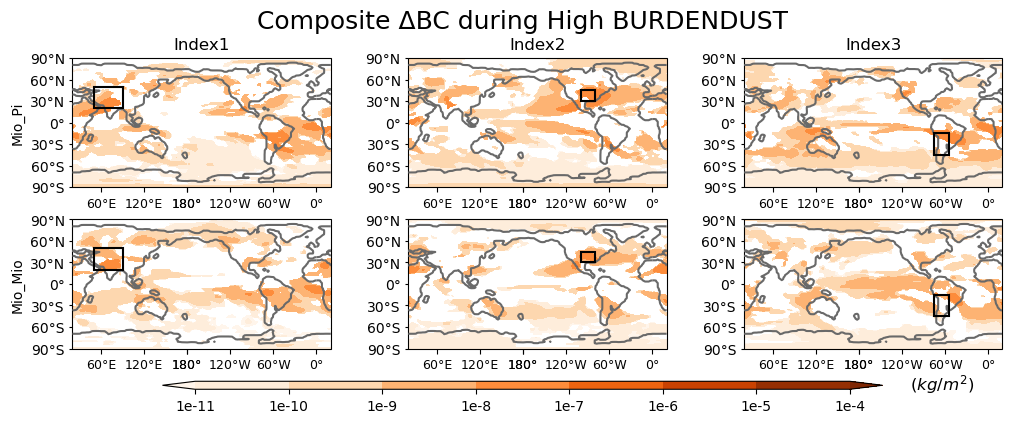

In [20]:
labels=['Index1','Index2', 'Index3','','', '']
levels = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4] # manually set the levels we want to see here
levels_ticks = ['1e-11','1e-10','1e-9','1e-8','1e-7','1e-6','1e-5','1e-4']

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(12, 4))

#flatten axs into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the composites and plot
for i,m in enumerate(high_bc):

        # Select the season
        data = high_bc[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=high_bc[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,high_bc[i]['lat'],data,        
                           levels = levels,
                           locator=ticker.LogLocator(),
                           transform = ccrs.PlateCarree(),
                           cmap='Oranges',extend='both')
        
        # label_latlon(axs[i], range_lat[i], range_lon[i])
        
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)
        
        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        cs_mask = axs[i].contour(lons,ds_Pi['lat'],mask,[0.1,1],
                                 transform = ccrs.PlateCarree(),
                                 linestyles='solid', colors='dimgrey', zorder=3)
        
        if i==0:
            axs[i].set_ylabel('Mio_Pi')
        elif i==3:
            axs[i].set_ylabel('Mio_Mio')
        else:
            axs[i].set_ylabel('')
            
        # Add patches
        # ( (x,y)[center: (200,0)], width, height, ...)
        if i==0 or i==3:
            rect1 = patches.Rectangle((-150, 20), 40, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (50~90E; 20~50N)
            axs[i].add_patch(rect1)
        elif i==1 or i==4:
            rect2 = patches.Rectangle((60, 30), 20, 15, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (100~80W; 30~45N)
            axs[i].add_patch(rect2)        
        else:
            rect3 = patches.Rectangle((85, -45), 20, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (75~55W; 15~45S)
            axs[i].add_patch(rect3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.03, 0.6, 0.02])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal',
                    format=mticker.FixedFormatter(levels_ticks))

# Add a big title at the top
plt.suptitle('Composite ΔBC during High BURDENDUST', y=0.98, fontsize=18) 
plt.figtext(0.85,0.03,'($kg/m^2$)',ha='center',fontsize=12)
;   

#### * Composite ΔPREC during Low BURDENDUST

''

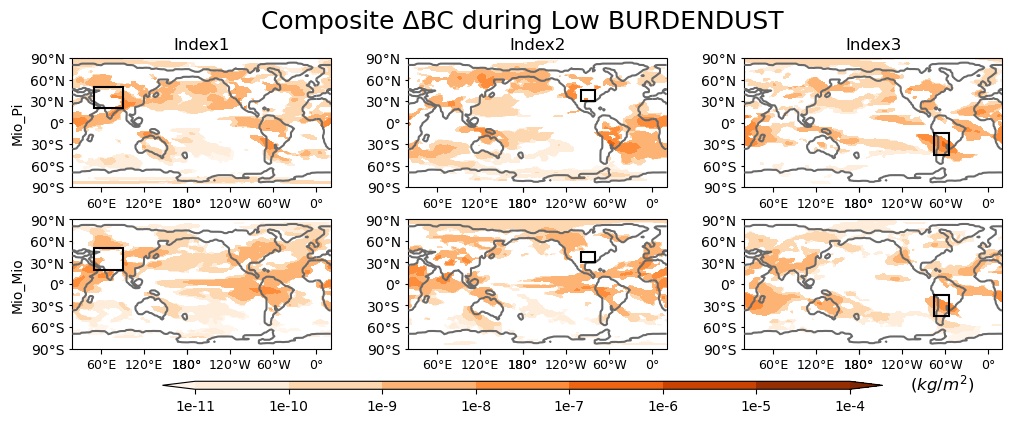

In [19]:
labels=['Index1','Index2', 'Index3','','', '']
clevs = np.linspace(-1.5, 1.5, 11)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(12, 4))

#flatten axs into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the composites and plot
for i,m in enumerate(low_bc):

        # Select the season
        data = low_bc[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=low_bc[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,low_bc[i]['lat'],data,                          
                           levels = levels,
                           locator=ticker.LogLocator(),
                           transform = ccrs.PlateCarree(),
                           cmap='Oranges',extend='both')
        
        # label_latlon(axs[i], range_lat[i], range_lon[i])
        
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)
        
        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        cs_mask = axs[i].contour(lons,ds_Pi['lat'],mask,[0.1,1],
                                 transform = ccrs.PlateCarree(),
                                 linestyles='solid', colors='dimgrey', zorder=3)
        
        if i==0:
            axs[i].set_ylabel('Mio_Pi')
        elif i==3:
            axs[i].set_ylabel('Mio_Mio')
        else:
            axs[i].set_ylabel('')
            
        # Add patches
        # ( (x,y)[center: (200,0)], width, height, ...)
        if i==0 or i==3:
            rect1 = patches.Rectangle((-150, 20), 40, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (50~90E; 20~50N)
            axs[i].add_patch(rect1)
        elif i==1 or i==4:
            rect2 = patches.Rectangle((60, 30), 20, 15, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (100~80W; 30~45N)
            axs[i].add_patch(rect2)        
        else:
            rect3 = patches.Rectangle((85, -45), 20, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (75~55W; 15~45S)
            axs[i].add_patch(rect3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.03, 0.6, 0.02])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal',
                    format=mticker.FixedFormatter(levels_ticks))

# Add a big title at the top
plt.suptitle('Composite ΔBC during Low BURDENDUST', y=0.98, fontsize=18) 
plt.figtext(0.85,0.03,'($kg/m^2$)',ha='center',fontsize=12)
;   

---
### (2) Composite Sulfate (SO4)
#### Read SO4 & Calculate anomalous SO4

In [22]:
# --- (var.): TS ---

SO4_Pi = ds_Pi2['BURDENSO4']

SO4_Pi_clim = SO4_Pi.groupby('time.month').mean()
SO4_Pi_ano = SO4_Pi.groupby('time.month')-SO4_Pi_clim

high_SO41_Pi = SO4_Pi_ano.sel(time=high_index1_Pi.dropna(dim='time')['time']).mean(dim='time')
low_SO41_Pi = SO4_Pi_ano.sel(time=low_index1_Pi.dropna(dim='time')['time']).mean(dim='time')
high_SO42_Pi = SO4_Pi_ano.sel(time=high_index2_Pi.dropna(dim='time')['time']).mean(dim='time')
low_SO42_Pi = SO4_Pi_ano.sel(time=low_index2_Pi.dropna(dim='time')['time']).mean(dim='time')
high_SO43_Pi = SO4_Pi_ano.sel(time=high_index3_Pi.dropna(dim='time')['time']).mean(dim='time')
low_SO43_Pi = SO4_Pi_ano.sel(time=low_index3_Pi.dropna(dim='time')['time']).mean(dim='time')


SO4_Mio = ds_Mio2['BURDENSO4']

SO4_Mio_clim = SO4_Mio.groupby('time.month').mean()
SO4_Mio_ano = SO4_Mio.groupby('time.month')-SO4_Mio_clim

high_SO41_Mio = SO4_Mio_ano.sel(time=high_index1_Mio.dropna(dim='time')['time']).mean(dim='time')
low_SO41_Mio = SO4_Mio_ano.sel(time=low_index1_Mio.dropna(dim='time')['time']).mean(dim='time')
high_SO42_Mio = SO4_Mio_ano.sel(time=high_index2_Mio.dropna(dim='time')['time']).mean(dim='time')
low_SO42_Mio = SO4_Mio_ano.sel(time=low_index2_Mio.dropna(dim='time')['time']).mean(dim='time')
high_SO43_Mio = SO4_Mio_ano.sel(time=high_index3_Mio.dropna(dim='time')['time']).mean(dim='time')
low_SO43_Mio = SO4_Mio_ano.sel(time=low_index3_Mio.dropna(dim='time')['time']).mean(dim='time')


high_SO4 = [high_SO41_Pi, high_SO42_Pi, high_SO43_Pi,
               high_SO41_Mio, high_SO42_Mio, high_SO43_Mio]
low_SO4 = [low_SO41_Pi, low_SO42_Pi, low_SO43_Pi,
               low_SO41_Mio, low_SO42_Mio, low_SO43_Mio]

#### * Composite ΔSO4 during High BURDENDUST

''

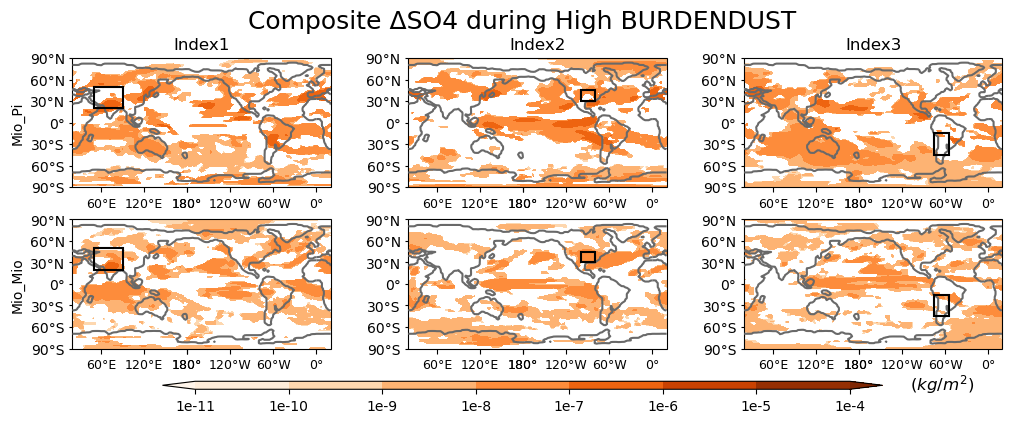

In [24]:
labels=['Index1','Index2', 'Index3','','', '']

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(12, 4))

#flatten axs into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the composites and plot
for i,m in enumerate(high_SO4):

        # Select the season
        data = high_SO4[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=high_SO4[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,high_SO4[i]['lat'],data,                           
                           levels = levels,
                           locator=ticker.LogLocator(),
                           transform = ccrs.PlateCarree(),
                           cmap='Oranges',extend='both')
        
        
        # label_latlon(axs[i], range_lat[i], range_lon[i])
        
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)
        
        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        cs_mask = axs[i].contour(lons,ds_Pi['lat'],mask,[0.1,1],
                                 transform = ccrs.PlateCarree(),
                                 linestyles='solid', colors='dimgrey', zorder=3)
        
        if i==0:
            axs[i].set_ylabel('Mio_Pi')
        elif i==3:
            axs[i].set_ylabel('Mio_Mio')
        else:
            axs[i].set_ylabel('')
            
        # Add patches
        # ( (x,y)[center: (200,0)], width, height, ...)
        if i==0 or i==3:
            rect1 = patches.Rectangle((-150, 20), 40, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (50~90E; 20~50N)
            axs[i].add_patch(rect1)
        elif i==1 or i==4:
            rect2 = patches.Rectangle((60, 30), 20, 15, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (100~80W; 30~45N)
            axs[i].add_patch(rect2)        
        else:
            rect3 = patches.Rectangle((85, -45), 20, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (75~55W; 15~45S)
            axs[i].add_patch(rect3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.03, 0.6, 0.02])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal',
                    format=mticker.FixedFormatter(levels_ticks))

# Add a big title at the top
plt.suptitle('Composite ΔSO4 during High BURDENDUST', y=0.98, fontsize=18) 
plt.figtext(0.85,0.03,'($kg/m^2$)',ha='center',fontsize=12)
;   

#### * Composite ΔSO4 during Low BURDENDUST

''

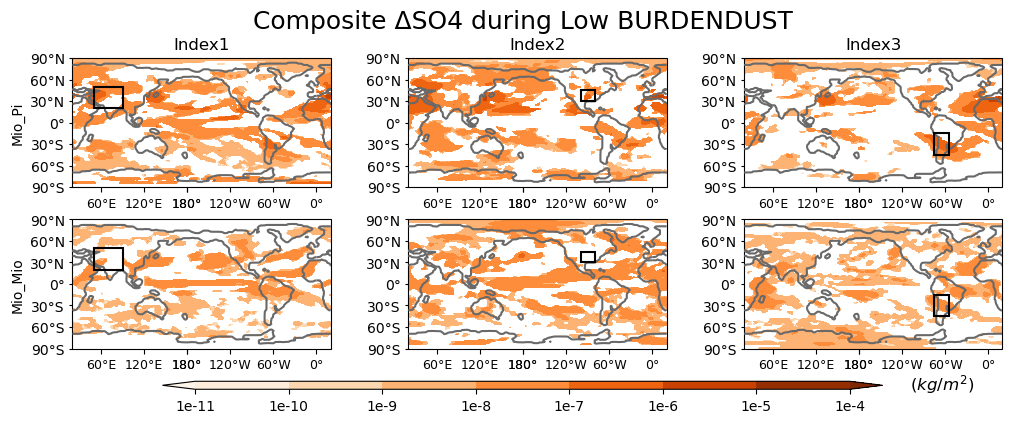

In [25]:
labels=['Index1','Index2', 'Index3','','', '']

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(12, 4))

#flatten axs into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the composites and plot
for i,m in enumerate(low_SO4):

        # Select the season
        data = low_SO4[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=low_SO4[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,low_SO4[i]['lat'],data,
                           levels = levels,
                           locator=ticker.LogLocator(),
                           transform = ccrs.PlateCarree(),
                           cmap='Oranges',extend='both')
        
        # label_latlon(axs[i], range_lat[i], range_lon[i])
        
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)
        
        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        cs_mask = axs[i].contour(lons,ds_Pi['lat'],mask,[0.1,1],
                                 transform = ccrs.PlateCarree(),
                                 linestyles='solid', colors='dimgrey', zorder=3)
        
        if i==0:
            axs[i].set_ylabel('Mio_Pi')
        elif i==3:
            axs[i].set_ylabel('Mio_Mio')
        else:
            axs[i].set_ylabel('')
            
        # Add patches
        # ( (x,y)[center: (200,0)], width, height, ...)
        if i==0 or i==3:
            rect1 = patches.Rectangle((-150, 20), 40, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (50~90E; 20~50N)
            axs[i].add_patch(rect1)
        elif i==1 or i==4:
            rect2 = patches.Rectangle((60, 30), 20, 15, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (100~80W; 30~45N)
            axs[i].add_patch(rect2)        
        else:
            rect3 = patches.Rectangle((85, -45), 20, 30, lw = 1.5, edgecolor = 'k', facecolor = 'none', zorder=5)  # (75~55W; 15~45S)
            axs[i].add_patch(rect3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.03, 0.6, 0.02])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal',
                    format=mticker.FixedFormatter(levels_ticks))

# Add a big title at the top
plt.suptitle('Composite ΔSO4 during Low BURDENDUST', y=0.98, fontsize=18) 
plt.figtext(0.85,0.03,'($kg/m^2$)',ha='center',fontsize=12)
;   

====================================================================================================================
## Summary:
#### It is possible that...